In [1]:
import pandas as pd
import nltk
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import preprocess_tweet, extract_keywords, analyze_sentiment
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from textblob import TextBlob
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# set base directory for reading and writing files
# base_directory = '/workspaces/prc/d8-twitter/data'

# when using ligntning.ai
base_directory = '/teamspace/studios/this_studio/prc/d8-twitter/data'
output_full = '/teamspace/studios/this_studio/prc/d8-twitter/data/processed/v1/'

In [3]:
# Load the CSV file into a pandas DataFrame
input_file = os.path.join(base_directory, 'raw', 'd8-theme-coding-advisory.csv')
df_raw = pd.read_csv(input_file)

# Selecting 'Tweet' column and renaming it to 'tweet'
df = df_raw[['Tweet']].rename(columns={'Tweet': 'tweet'})
df.head()

,tweet
0,Delta 8 is fire Red heart happy puffing
1,HYDRATE!!!! delta 8 is kinda drying!
2,"I agree with Dinah; if forced to choose, I'd ..."
3,I don't understand why the FDA and CDC can't g...
4,FDA And CDC Issue Warnings On Hemp-Derived Pr...


In [4]:
# Load tweets into a new dataframe and process data
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet) # Replace 'tweet_column' with your column name

# Extract keywords using frequency analysis
freq_dist = nltk.FreqDist(word for tweet in df['tweet'] for word in word_tokenize(tweet) if word not in stopwords.words('english'))

# Review extraction
print("Keywords by Frequency Analysis:")
print(freq_dist.most_common(10)) # Adjust the number for more or fewer keywords

# Extract keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english') # Adjust max_features for more keywords
tfidf_matrix = vectorizer.fit_transform(df['cleaned_tweet'])
feature_names = vectorizer.get_feature_names_out()

# Review extraction
print("\nKeywords by TF-IDF:")
for word in feature_names:
    print(word)


Keywords by Frequency Analysis:
[('.', 479), ('8', 391), ('I', 307), ('delta', 235), (',', 218), ('’', 177), ('Delta', 173), ('THC', 109), ('Delta-8', 65), ('like', 59)]

Keywords by TF-IDF:
cbd
delta
high
im
just
like
products
shit
thc
weed


In [5]:
# clean the tweet, removing URLs, special characters, and numbers
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

# Extract keywords for each tweet
df['keywords'] = df['cleaned_tweet'].apply(extract_keywords)

# Display the DataFrame
print(df[['tweet', 'keywords']])

# Review again the first 10 rows of the data frame.
df.head(10)

                                                 tweet  \
0              Delta 8 is fire Red heart happy puffing   
1                 HYDRATE!!!! delta 8 is kinda drying!   
2     I agree with Dinah; if forced to choose, I'd ...   
3    I don't understand why the FDA and CDC can't g...   
4     FDA And CDC Issue Warnings On Hemp-Derived Pr...   
..                                                 ...   
495   Last Monday Michigan put all THC products und...   
496             Time to rot my brain with some delta 8   
497  Try Delta 8:) google it if you don’t already k...   
498   In Texas right now Delta 8 is legal, it fell ...   
499                                                SUM   

                                              keywords  
0                    delta, happy, heart, puffing, red  
1                        delta, drying, hydrate, kinda  
2    agree, cannabis, chemicals, choose, delta, din...  
3    cdc, come, delta, dont, fda, hemp, industry, l...  
4    administratio

,tweet,cleaned_tweet,keywords
0,Delta 8 is fire Red heart happy puffing,delta is fire red heart happy puffing,"delta, happy, heart, puffing, red"
1,HYDRATE!!!! delta 8 is kinda drying!,hydrate delta is kinda drying,"delta, drying, hydrate, kinda"
2,"I agree with Dinah; if forced to choose, I'd ...",i agree with dinah if forced to choose id pic...,"agree, cannabis, chemicals, choose, delta, din..."
3,I don't understand why the FDA and CDC can't g...,i dont understand why the fda and cdc cant get...,"cdc, come, delta, dont, fda, hemp, industry, l..."
4,FDA And CDC Issue Warnings On Hemp-Derived Pr...,fda and cdc issue warnings on hempderived pro...,"administration, cdc, centers, consumers, consu..."
5,ngl the delta 8 gummies kinda hit,ngl the delta gummies kinda hit,"delta, gummies, hit, kinda, ngl"
6,"""Adverse events included vomiting, hallucinat...",adverse events included vomiting hallucinatio...,"adulterants, adverse, analytical, chemistry, c..."
7,The American Association of Poison Control Ce...,the american association of poison control ce...,"aapcc, according, adverse, american, associati..."
8,You not even getting high off that delta 8 shi...,you not even getting high off that delta shit...,"delta, getting, high, just, life, migraines, r..."
9,For the science guys: Delta-8 marijuana produ...,for the science guys delta marijuana products...,"dangerous, delta, guys, health, marijuana, off..."


In [6]:
# Save the updated DataFrame to a new CSV file
# output_file = os.path.join(base_directory, output_folder, 'tweets_with_keywords.csv')
output_file = os.path.join(output_full, 'tweets_with_keywords.csv')

df.to_csv(output_file, index=False)

In [65]:
# Apply sentiment analysis
df['polarity'], df['subjectivity'] = zip(*df['tweet'].apply(analyze_sentiment))
output_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df.to_csv(output_file, index=False)

In [66]:
# Load the DataFrame
input_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df = pd.read_csv(input_file)
df.head(10)

,tweet,cleaned_tweet,keywords,polarity,subjectivity
0,Delta 8 is fire Red heart happy puffing,delta is fire red heart happy puffing,"delta, happy, heart, puffing, red",0.400000,0.500000
1,HYDRATE!!!! delta 8 is kinda drying!,hydrate delta is kinda drying,"delta, drying, hydrate, kinda",0.000000,0.000000
2,"I agree with Dinah; if forced to choose, I'd ...",i agree with dinah if forced to choose id pic...,"agree, cannabis, chemicals, choose, delta, din...",-0.094444,0.344444
3,I don't understand why the FDA and CDC can't g...,i dont understand why the fda and cdc cant get...,"cdc, come, delta, dont, fda, hemp, industry, l...",0.000000,0.000000
4,FDA And CDC Issue Warnings On Hemp-Derived Pr...,fda and cdc issue warnings on hempderived pro...,"administration, cdc, centers, consumers, consu...",0.000000,1.000000
5,ngl the delta 8 gummies kinda hit,ngl the delta gummies kinda hit,"delta, gummies, hit, kinda, ngl",0.000000,0.000000
6,"""Adverse events included vomiting, hallucinat...",adverse events included vomiting hallucinatio...,"adulterants, adverse, analytical, chemistry, c...",0.231250,0.425000
7,The American Association of Poison Control Ce...,the american association of poison control ce...,"aapcc, according, adverse, american, associati...",0.050000,0.200000
8,You not even getting high off that delta 8 shi...,you not even getting high off that delta shit...,"delta, getting, high, just, life, migraines, r...",-0.020000,0.670000
9,For the science guys: Delta-8 marijuana produ...,for the science guys delta marijuana products...,"dangerous, delta, guys, health, marijuana, off...",-0.600000,0.900000


In [67]:
from collections import Counter

input_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df = pd.read_csv(input_file)
df.head(10)

# Function to split keywords and flatten the list
def extract_keywords(keywords_series):
    return sum(keywords_series.apply(lambda x: x.split(', ')), [])

# Extracting all keywords into a single list
all_keywords = extract_keywords(df['keywords'])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Most common keywords
most_common_keywords = keyword_frequency.most_common(10)

# Display the most common keywords
print("Most Common Keywords:")
for keyword, frequency in most_common_keywords:
    print(f"{keyword}: {frequency}")


Most Common Keywords:
delta: 487
thc: 103
like: 54
high: 53
cbd: 53
just: 50
shit: 41
weed: 38
im: 38
legal: 37


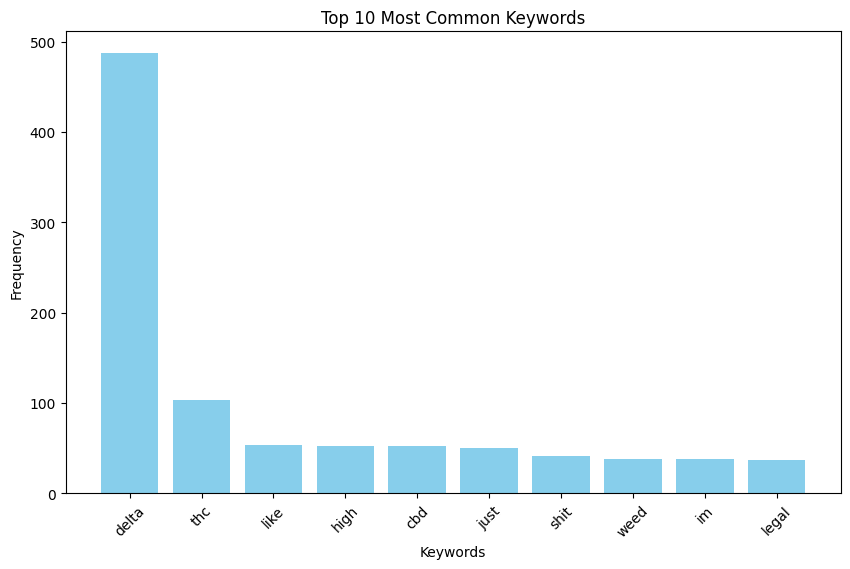

In [68]:
import matplotlib.pyplot as plt
from collections import Counter

# Extracting all keywords into a single list
all_keywords = sum(df['keywords'].apply(lambda x: x.split(', ')), [])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Getting the 10 most common keywords
most_common_keywords = keyword_frequency.most_common(10)
keywords, frequencies = zip(*most_common_keywords)

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keywords, frequencies, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Keywords')
plt.xticks(rotation=45)

output_file = os.path.join(output_full, 'keyword_frequency_graph.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)
plt.show()

In [69]:
from collections import Counter

# Extracting all keywords into a single list
all_keywords = sum(df['keywords'].apply(lambda x: x.split(', ')), [])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Convert the keyword frequency dictionary to a DataFrame
df_keywords = pd.DataFrame(keyword_frequency.items(), columns=['Keyword', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_keywords = df_keywords.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the first few rows of the new DataFrame
print(df_keywords.head())

output_file = os.path.join(output_full, 'keyword_frequency.csv')
df_keywords.to_csv(output_file, index=False)

  Keyword  Frequency
0   delta        487
1     thc        103
2    like         54
3     cbd         53
4    high         53


In [70]:
themes = {
    "Cannabis Types and Components": ["delta", "thc", "cbd"],
    "User Experience": ["high", "weed"],
    "Legality and Regulation": ["legal"],
    "General Conversation": ["like", "just", "Shit"]
}

# Initialize a counter for each theme
theme_counts = {theme: 0 for theme in themes}

# Iterate over each tweet
for index, row in df.iterrows():
    tweet_keywords = row['keywords'].split(', ')
    for theme, theme_keywords in themes.items():
        if any(keyword in tweet_keywords for keyword in theme_keywords):
            theme_counts[theme] += 1

# Convert theme_counts to a DataFrame for better visualization
df_theme_counts = pd.DataFrame(theme_counts.items(), columns=['Theme', 'Count'])

# Display the first few rows of the new DataFrame
print(df_theme_counts.head())

output_file = os.path.join(output_full, 'theme_frequency.csv')
df_theme_counts.to_csv(output_file, index=False)

                           Theme  Count
0  Cannabis Types and Components    490
1                User Experience     83
2        Legality and Regulation     37
3           General Conversation     98
